#❗Avoid re-running any code in this notebook! Please reference only.
> If you need to update something or build off this notebook, please make a copy. Also see the best model checkpoint file from this implemnetation in the folder in Drive where this notebook is. Thats what we should be using as we experiment with new data.

# ⛈️  The HurriScan Project - Implementation of the Top-Performing Model ⭐

## Overview:

In this project, we leverage transfer learning using the AlexNet architecture for image classification. The primary goal is to harness features extracted by the AlexNet convolutional layers to build a custom classifier tailored to a specific image classification task. The dataset has been segmented into training, test, and validation sets.

###Model Architecture:
We have designed a custom classifier, CNN_Classifier_for_ALNC, which utilizes the features extracted by the AlexNet convolutional layers (ALNC). The model architecture includes convolutional and fully connected layers to learn and classify features relevant to the given task.

###Training Architecture:
The training process involves using a custom training function that incorporates a cross-entropy loss function and stochastic gradient descent (SGD) optimizer. The model is trained over multiple epochs, iterating through mini-batches and updating parameters to improve classification performance.

###Data Visualizations:
We have also included within this notebook a visualization section that provides visual representations of the dataset, model performance metrics, and other relevant insights, enhancing the understanding of the classification and model development process.

---

## Notebooks:
1. **Data Cleaning**: This notebook focuses on cleaning and preprocessing the raw data.
   - [Link to Data Cleaning Notebook](https://colab.research.google.com/drive/1Is4y5TEFfYPT3XywOfIzW6Z2AfAAgVLO?usp=sharing)
2. **Baseline Model**: This notebook establishes a baseline model for our analysis.
   - [Link to Baseline Model Notebook](https://colab.research.google.com/drive/1hUlx-JxNp485C3jvERHSUC7xS15bziNu)  
3. **Data Acquisition Notebook**:
   - [Data Acquisition Notebook](https://colab.research.google.com/drive/1Is4y5TEFfYPT3XywOfIzW6Z2AfAAgVLO?usp=sharing)
4. **Data Pre-Processing Notebook**:
   - [Data Pre-Processing Notebook](https://colab.research.google.com/drive/1KL7vYRCZrPBDAuBISqx75eIhxeLiGl4C?usp=sharing)
5. **Primary Model Notebook**:
   - [Primary Model Notebook](https://colab.research.google.com/drive/1p177NLl-bws1fxcjVOppzni8Oir6NMrl?usp=sharing)
6. **Evaluation on New Data Notebook**:
   - [Evaluation on New Data Notebook](https://colab.research.google.com/drive/1QUZqM3CsfXWSTIYhq1cFHyfK1YykGePV?usp=sharing)
---

## Group Members:
1. Charlotte Fritz - [@charlottepfritz](https://github.com/charlottepfritz)
2. Claire - [@Claire](https://github.com/macaroonforu)
3. Sean - [@Sean](https://github.com/seanpourgoutzidis)
4. Thardchi - [@Thardchi](https://github.com/thardchi)
---

# Part 1 - Setting up the Notebook

> Loading relevant libraries and mounting to Google Drive

In [ ]:
# begin by mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# then I import required libraries
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
import numpy as np
import matplotlib.pyplot as plt
import time
import torch.optim as optim

# Part 2 - Performing data processing

> Loading the dataset images and labels, and applying transformations to the dataset

In [ ]:
torch.manual_seed(1) # set the random seed
# loading and transforming data using ImageFolder
data_transform = transforms.Compose([
    # ensure all images are 224x224
    transforms.Resize((224, 224)),
    # convert images to PyTorch tensors
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# using torchvision.datasets.ImageFolder...
dataset = datasets.ImageFolder('/content/drive/MyDrive/APS360_Team_11_Project_Folder/Final_Deliverable/The_HurriScan_Project_Implementation_of_the_Top_Performing_Model/new_split_data/train', transform=data_transform)
# so now all the images are stored in one dataset. we will segment this dataset.

# classes are folders in each directory with these names
classes = ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5']

> Splitting the data for training, valdiation and testing

In [ ]:
torch.manual_seed(1) # set the random seed

# get the relevant indices for splitting
train_indices, val_indices = train_test_split(np.arange(len(dataset)),
                                      train_size = 0.8, random_state = 42)
# and then load in as datasets for each subset
train_data = Subset(dataset, train_indices)
val_data = Subset(dataset, val_indices)

> Data distribution after split

In [ ]:
print("Number of training images:", len(train_data))
print("Number of validation images:", len(val_data))

Number of training images: 5483
Number of validation images: 1371


> Loading the data

In [ ]:
# define dataloader parameters
batch_size  = 64
num_workers = 0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                           num_workers=num_workers, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size,
                                          num_workers=num_workers, shuffle=True)

# Part 3 - Implementing Alexnet

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim #for gradient descent

# alexnet
import torchvision.models

torch.manual_seed(1) # set the random seed

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# confirm output from AlexNet feature extraction
alexNet = torchvision.models.alexnet(pretrained=True)
features = alexNet.features(images)
features.shape

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 175MB/s]


torch.Size([64, 256, 6, 6])

# Part 4 - Defining the Model Architecture

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

#Convolutional Neural Network Architecture
class CNN_Classifier_for_ALNC(nn.Module):
    def __init__(self):
        super(CNN_Classifier_for_ALNC, self).__init__()
        self.name = "CNN_Classifier";
        self.conv1 = nn.Conv2d(256, 128, 3, 1, 3) #in_channels, out_chanels, kernel_size
        self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride
        self.conv2 = nn.Conv2d(128, 64, 2, 1, 1, 1) #in_channels, out_chanels, kernel_size
        self.fc1 = nn.Linear(64*3*3, 256)
        self.fc2 = nn.Linear(256, 6)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64*3*3)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Part 5 - Defining the Training Architecture

In [ ]:
############# helper funtion to save model name at checkpoint
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

In [ ]:
def get_accuracy(model, train=False):
    if train:
        data_loader = train_loader
    else:
        data_loader = val_loader

    correct = 0
    total = 0
    for imgs, labels in data_loader:


        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################

        output = model(ALNC(imgs))

        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
def train(model, data, batch_size=20, num_epochs=1):
    #train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size)
    # train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                           #num_workers=num_workers, shuffle=True)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    start_time=time.time()
    for epoch in range(num_epochs):
        mini_b=0
        mini_batch_correct = 0
        Mini_batch_total = 0
        for imgs, labels in iter(train_loader):


            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################

          #### ALNC is alexNet.features (AlexNet without classifier) ####

            out = model(ALNC(imgs))             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch



            ##### Mini_batch Accuracy ##### We don't compute accuracy on the whole training set in every iteration!
            pred = out.max(1, keepdim=True)[1]
            mini_batch_correct = pred.eq(labels.view_as(pred)).sum().item()
            Mini_batch_total = imgs.shape[0]
            train_acc.append((mini_batch_correct / Mini_batch_total))
           ###########################

          # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            val_acc.append(get_accuracy(model, train=False))  # compute validation accuracy
            n += 1
            mini_b += 1
            print("Iteration: ",n,'Progress: % 6.2f ' % ((epoch * len(train_loader) + mini_b) / (num_epochs * len(train_loader))*100),'%', "Time Elapsed: % 6.2f s " % (time.time()-start_time))
            # Save the current model (checkpoint) to a file
            learning_rate = 0.01
        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)

        print("Epoch %d Finished. " % epoch ,"Time per Epoch: % 6.2f s "% ((time.time()-start_time) / (epoch +1)))
        print(("Epoch {}: Losses err: {}, Train acc: {} |"+
               "Validation acc: {}").format(
                   epoch,
                   losses[-1],
                   train_acc[-1],
                   val_acc[-1]))

    end_time= time.time()
    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Training")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Validation Accuracy")
    plt.legend(loc='best')
    plt.show()

    train_acc.append(get_accuracy(model, train=True))
    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
    print ("Total time:  % 6.2f s  Time per Epoch: % 6.2f s " % ( (end_time-start_time), ((end_time-start_time) / num_epochs) ))


# Part 6 - Training the model

In [ ]:
!nvidia-smi

Thu Nov 30 12:32:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

CUDA is available!  Training on GPU ...
Iteration:  1 Progress:   0.23  % Time Elapsed:  211.43 s 
Iteration:  2 Progress:   0.47  % Time Elapsed:  228.61 s 
Iteration:  3 Progress:   0.70  % Time Elapsed:  245.02 s 
Iteration:  4 Progress:   0.93  % Time Elapsed:  260.68 s 
Iteration:  5 Progress:   1.16  % Time Elapsed:  276.84 s 
Iteration:  6 Progress:   1.40  % Time Elapsed:  293.75 s 
Iteration:  7 Progress:   1.63  % Time Elapsed:  312.42 s 
Iteration:  8 Progress:   1.86  % Time Elapsed:  330.24 s 
Iteration:  9 Progress:   2.09  % Time Elapsed:  347.11 s 
Iteration:  10 Progress:   2.33  % Time Elapsed:  365.06 s 
Iteration:  11 Progress:   2.56  % Time Elapsed:  381.77 s 
Iteration:  12 Progress:   2.79  % Time Elapsed:  398.48 s 
Iteration:  13 Progress:   3.02  % Time Elapsed:  416.42 s 
Iteration:  14 Progress:   3.26  % Time Elapsed:  433.79 s 
Iteration:  15 Progress:   3.49  % Time Elapsed:  451.54 s 
Iteration:  16 Progress:   3.72  % Time Elapsed:  468.02 s 
Iteration

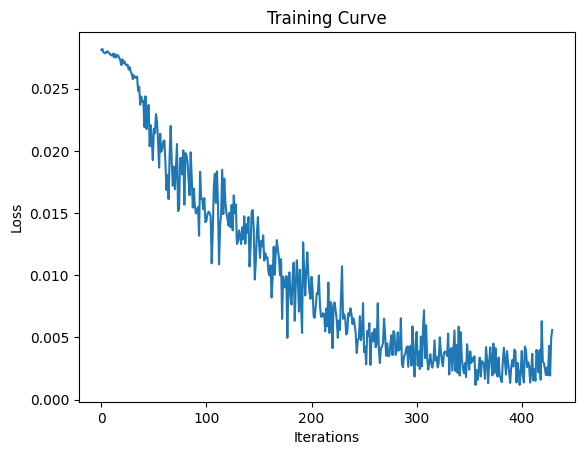

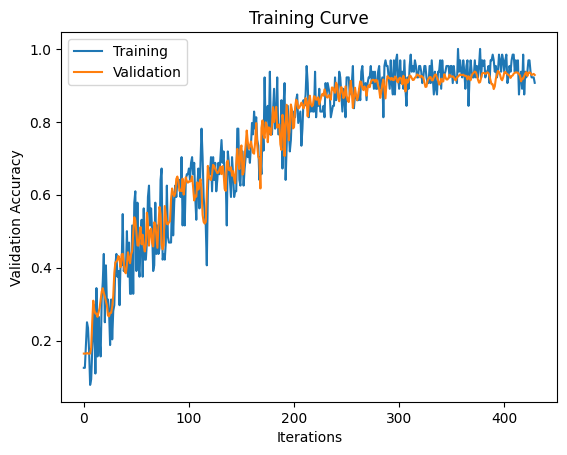

Final Training Accuracy: 0.945650191501003
Final Validation Accuracy: 0.9285193289569658
Total time:   4470.47 s  Time per Epoch:  894.09 s 


In [ ]:
use_cuda = True

model = CNN_Classifier_for_ALNC()
ALNC = alexNet.features

if use_cuda and torch.cuda.is_available():
  ALNC.cuda()
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train(model, [], batch_size=batch_size, num_epochs=5)

# Part 7 - Evaluating the model

In [ ]:
############# helper funtion to calculate model accuracy for test data
def evaluate(model, loader):
    data_loader = loader
    correct = 0
    total = 0
    for imgs, labels in data_loader:

        ############################################
        # To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        ############################################

        output = model(ALNC(imgs))

        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

> Loading our best historical model (note that this is saved in the folder where this notebook resides)

In [ ]:
# loading checkpoint
net = CNN_Classifier_for_ALNC()
net.cuda()
model_path = get_model_name('CNN_Classifier', batch_size=batch_size, learning_rate=0.01, epoch=4)
state = torch.load(model_path)
net.load_state_dict(state)

NameError: ignored

In [ ]:
torch.manual_seed(1) # set the random seed
batch_size = 64

# prepare data loaders
# loading our test data from a seperate directory, containg never-before-seen images
test_data = datasets.ImageFolder('/content/drive/MyDrive/APS360_Team_11_Project_Folder/Final_Deliverable/The_HurriScan_Project_Implementation_of_the_Top_Performing_Model/new_split_data/test', transform=data_transform)

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                           num_workers=num_workers, shuffle=False)

accuracy = evaluate(net, test_loader)
print("Test accuracy for best model: ", accuracy)

Test accuracy for best model:  0.7086614173228346


In [ ]:
torch.manual_seed(1) # set the random seed
batch_size = 64

# prepare data loaders
# loading our test data from a seperate directory, containg never-before-seen images
test_data = datasets.ImageFolder('/content/drive/MyDrive/APS360_Team_11_Project_Folder/Final_Deliverable/The_HurriScan_Project_Implementation_of_the_Top_Performing_Model/old/new_test_data', transform=data_transform)

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                           num_workers=num_workers, shuffle=False)

accuracy = evaluate(net, test_loader)
print("Test accuracy for best model: ", accuracy)

NameError: ignored



---



# Part 8 - Visualizing the Implementation

> ## Data distribution across the three datasets (using the 60, 20, 20 split)

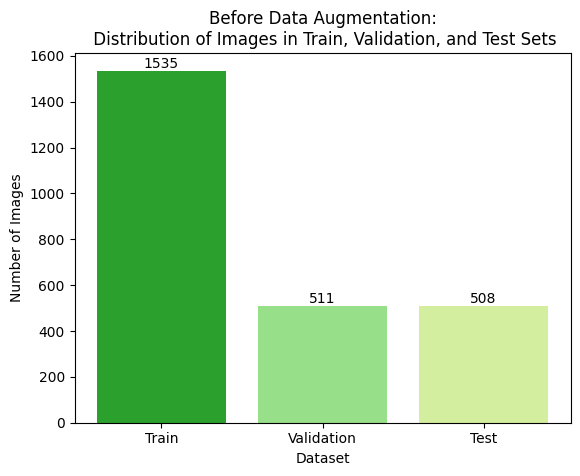

In [ ]:
import matplotlib.pyplot as plt

# Assuming train_data, val_data, and test_data are your datasets
train_size = len(train_data)
val_size = len(val_data)
test_size = len(test_data)

# Labels for the bars
labels = ['Train', 'Validation', 'Test']

# Sizes of each set
# vals are from data augmentation notebook archive
sizes = [1535, 511, 508]

# Different shades of blue
colors = ['#2ca02c', '#98df8a', '#d4ee9f']
# Plotting the distribution with numbers on top of bars
fig, ax = plt.subplots()
bars = plt.bar(labels, sizes, color=colors)

# Displaying the number on top of each bar
for bar, size in zip(bars, sizes):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(size, 2), ha='center', va='bottom')

plt.title('Before Data Augmentation:\n Distribution of Images in Train, Validation, and Test Sets')
plt.xlabel('Dataset')
plt.ylabel('Number of Images')

plt.show()

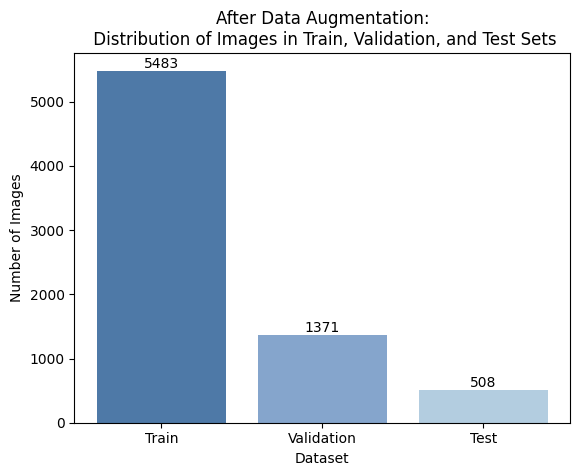

In [ ]:
import matplotlib.pyplot as plt

# Assuming train_data, val_data, and test_data are your datasets
train_size = len(train_data)
val_size = len(val_data)
test_size = len(test_data)

# Labels for the bars
labels = ['Train', 'Validation', 'Test']

# Sizes of each set
sizes = [train_size, val_size, test_size]

# Different shades of blue
colors = ['#4e79a7', '#85a5cc', '#b3cde0']

# Plotting the distribution with numbers on top of bars
fig, ax = plt.subplots()
bars = plt.bar(labels, sizes, color=colors)

# Displaying the number on top of each bar
for bar, size in zip(bars, sizes):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(size, 2), ha='center', va='bottom')

plt.title('After Data Augmentation:\n Distribution of Images in Train, Validation, and Test Sets')
plt.xlabel('Dataset')
plt.ylabel('Number of Images')

plt.show()

> ## Class distribution across the datasets (showing a balanced dataset)

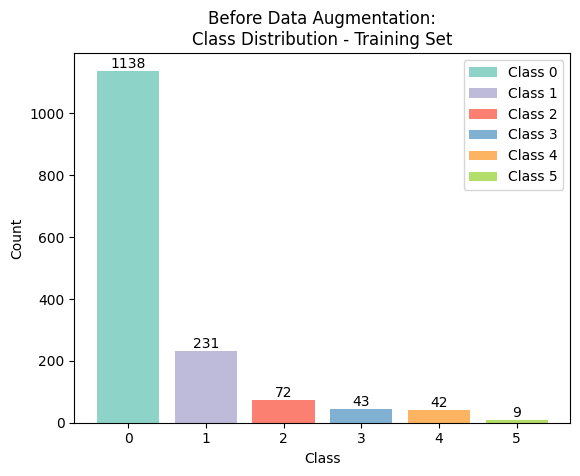

In [ ]:
import matplotlib.pyplot as plt

# Hardcoded values for bar heights
class_values = {0: 1138, 1: 231, 2: 72, 3: 43, 4: 42, 5: 9}

# Custom pastel colors for each class
pastel_colors = ['#8dd3c7', '#bebada', '#fb8072', '#80b1d3', '#fdb462', '#b3de69']

# Plotting the bar graph
for cls, value in class_values.items():
    color = pastel_colors[cls % len(pastel_colors)]
    plt.bar(cls, value, color=color, label=f'Class {cls}')
    plt.text(cls, value + 0.1, str(value), ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title(f'Before Data Augmentation:\nClass Distribution - Training Set')
plt.legend()
plt.show()


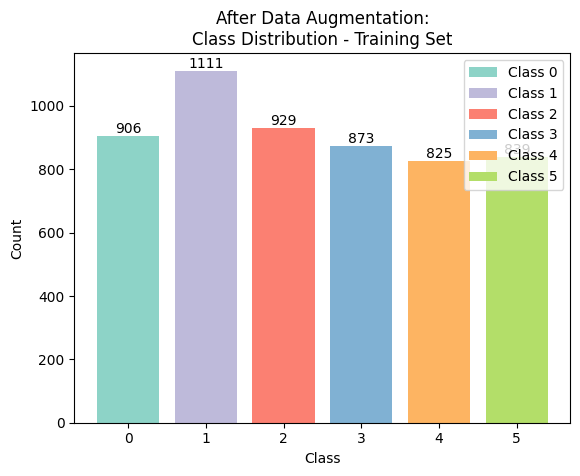

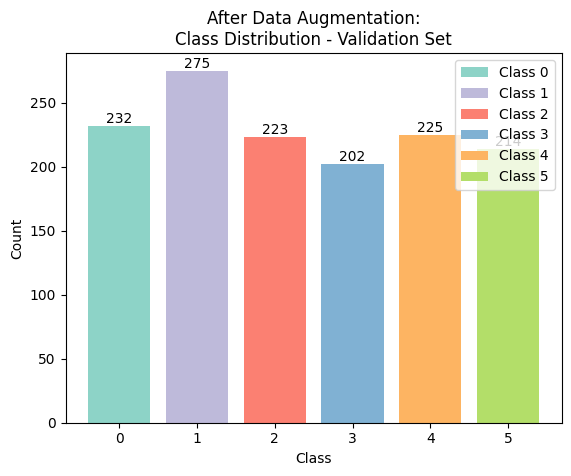

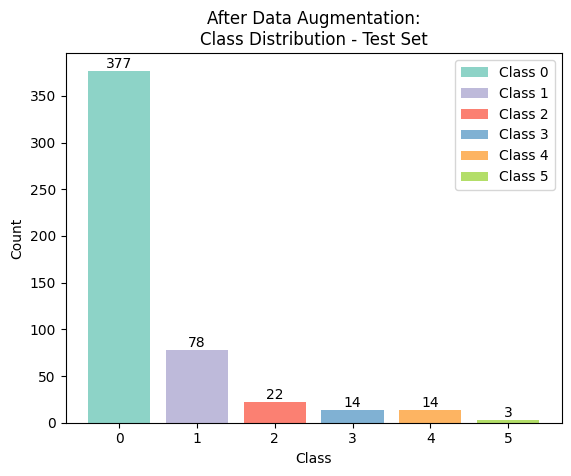

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'train_data', 'val_data', and 'test_data' are Subsets containing class labels
train_classes = [item[1] for item in train_data]  # Assuming class labels are at index 1
val_classes = [item[1] for item in val_data]
test_classes = [item[1] for item in test_data]

# Function to plot class distribution with different pastel colors for each class and annotations
def plot_class_distribution(classes, subset_name):
    unique_classes = sorted(set(classes))

    # Custom pastel colors for each class
    pastel_colors = ['#8dd3c7', '#bebada', '#fb8072', '#80b1d3', '#fdb462', '#b3de69']

    class_counts = {cls: classes.count(cls) for cls in unique_classes}
    for cls, count in class_counts.items():
        color = pastel_colors[unique_classes.index(cls) % len(pastel_colors)]
        plt.bar(cls, count, color=color, label=f'Class {cls}')
        plt.text(cls, count + 0.1, str(count), ha='center', va='bottom')

    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title(f'After Data Augmentation:\nClass Distribution - {subset_name}')
    plt.legend()
    plt.show()

# Plotting class distribution for each subset with different pastel colors for each class and annotations
plot_class_distribution(train_classes, 'Training Set')
plot_class_distribution(val_classes, 'Validation Set')
plot_class_distribution(test_classes, 'Test Set')



> ## Performance matrices

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_model(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for imgs, labels in data_loader:
            if use_cuda and torch.cuda.is_available():
                imgs = imgs.cuda()
                labels = labels.cuda()

            out = model(ALNC(imgs))
            preds = out.max(1, keepdim=True)[1]
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return np.array(all_preds), np.array(all_labels)

# Assuming you have a validation loader called val_loader
preds, labels = evaluate_model(net, val_loader)

# Confusion Matrix
cm = confusion_matrix(labels, preds)

# Classification Report (includes precision, recall, f1-score)
report = classification_report(labels, preds)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

Confusion Matrix:
[[223   1   0   8   0   0]
 [ 42 220   1  10   2   0]
 [ 11   3 207   2   0   0]
 [  6   3   0 193   0   0]
 [  9   0   0   0 216   0]
 [  0   0   0   0   0 214]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.85       232
           1       0.97      0.80      0.88       275
           2       1.00      0.93      0.96       223
           3       0.91      0.96      0.93       202
           4       0.99      0.96      0.98       225
           5       1.00      1.00      1.00       214

    accuracy                           0.93      1371
   macro avg       0.94      0.93      0.93      1371
weighted avg       0.94      0.93      0.93      1371



> ### Graphical display for validation

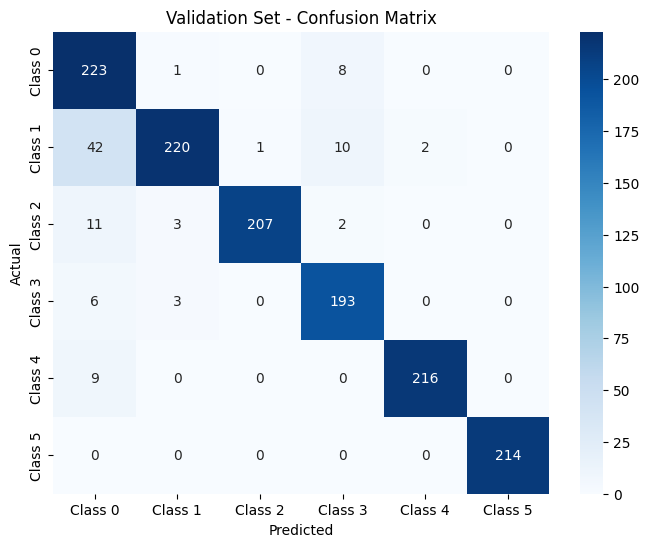

Class 0: Precision=0.7663, Recall=0.9612, F1-score=0.8528
Class 1: Precision=0.9692, Recall=0.8000, F1-score=0.8765
Class 2: Precision=0.9952, Recall=0.9283, F1-score=0.9606
Class 3: Precision=0.9061, Recall=0.9554, F1-score=0.9301
Class 4: Precision=0.9908, Recall=0.9600, F1-score=0.9752
Class 5: Precision=1.0000, Recall=1.0000, F1-score=1.0000

Overall Accuracy: 0.9285


In [ ]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

def evaluate_model(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for imgs, labels in data_loader:
            if use_cuda and torch.cuda.is_available():
                imgs = imgs.cuda()
                labels = labels.cuda()

            out = model(ALNC(imgs))
            preds = out.max(1, keepdim=True)[1]
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return np.array(all_preds), np.array(all_labels)

# Assuming you have class_names defined
class_names = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5"]  # Replace with your actual class names


# Evaluate the model on the validation set
preds, labels = evaluate_model(net, val_loader)

# Confusion Matrix
cm = confusion_matrix(labels, preds)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Validation Set - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report without support and macro average
report = classification_report(labels, preds, output_dict=True)

# Display the modified classification report
for class_name, metrics in report.items():
    if class_name.isdigit():
        # Display metrics for each individual class
        print(f"Class {class_name}: Precision={metrics['precision']:.4f}, Recall={metrics['recall']:.4f}, F1-score={metrics['f1-score']:.4f}")

# Print the overall accuracy
accuracy = np.sum(np.diag(cm)) / np.sum(cm)
print(f"\nOverall Accuracy: {accuracy:.4f}")

> ## Graphical display for test

In [ ]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

def evaluate_model(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for imgs, labels in data_loader:
            if use_cuda and torch.cuda.is_available():
                imgs = imgs.cuda()
                labels = labels.cuda()

            out = model(ALNC(imgs))
            preds = out.max(1, keepdim=True)[1]
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return np.array(all_preds), np.array(all_labels)

# Assuming you have class_names defined
class_names = ["Category 0", "Category 1", "Category 2", "Category 3", "Category 4", "Category 5"]  # Replace with your actual class names


# Evaluate the model on the validation set
preds, labels = evaluate_model(net, test_loader)

# Confusion Matrix
cm = confusion_matrix(labels, preds)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=class_names, yticklabels=class_names)
plt.title("Test Set - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report without support and macro average
report = classification_report(labels, preds, output_dict=True)

# Display the modified classification report
for class_name, metrics in report.items():
    if class_name.isdigit():
        # Display metrics for each individual class
        print(f"Class {class_name}: Precision={metrics['precision']:.4f}, Recall={metrics['recall']:.4f}, F1-score={metrics['f1-score']:.4f}")

# Print the overall accuracy
accuracy = np.sum(np.diag(cm)) / np.sum(cm)
print(f"\nOverall Accuracy: {accuracy:.4f}")

> ## About the model

In [ ]:
# Use torchsummary to visualize the model architecture
from torchsummary import summary

# Assuming input size is (256, 256)
summary(model, (256, 6, 6))

RuntimeError: ignored

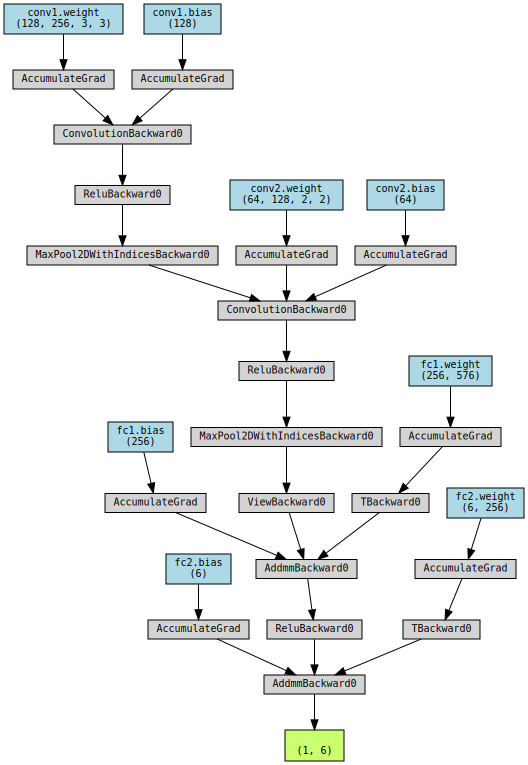

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchviz import make_dot

# Move the model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

# Create a dummy input on the same device
dummy_input = torch.randn(1, 256, 6, 6).to(device)

# Use torchviz to create a graph visualization
make_dot(net(dummy_input), params=dict(net.named_parameters()))

> ## Sample set of images with class labels

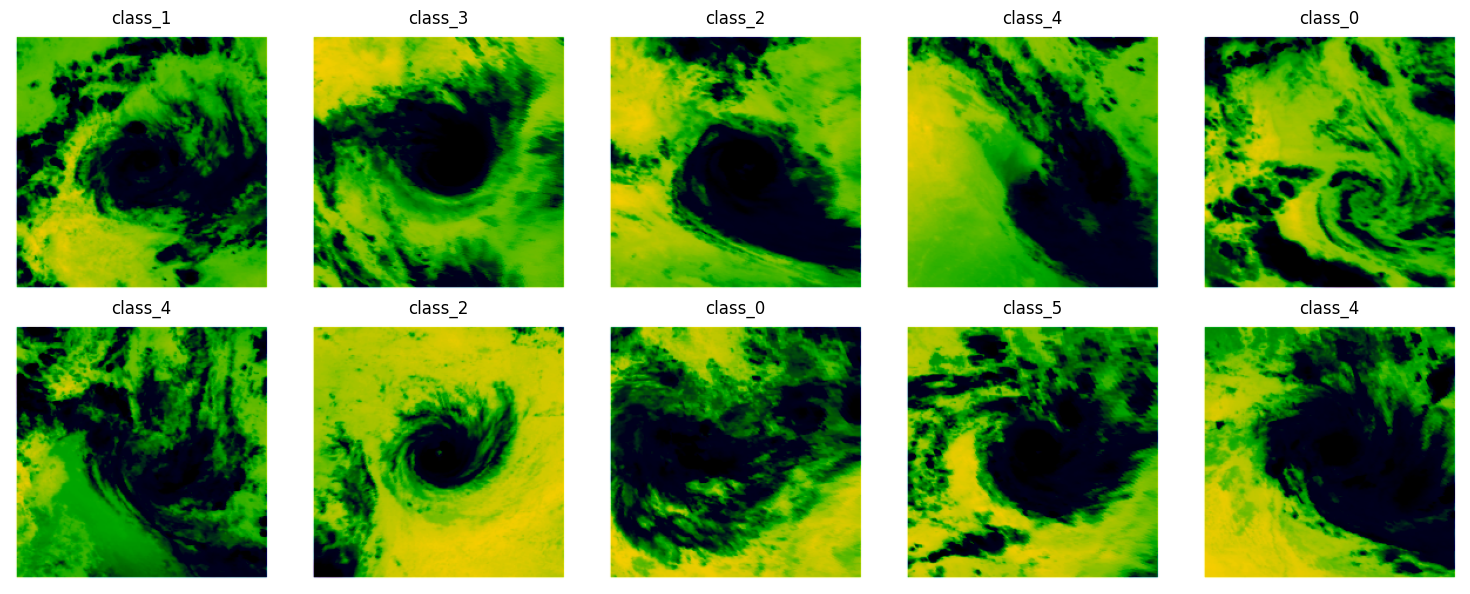

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()  # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

for idx, ax in enumerate(axes.flatten()):
    img = np.transpose(images[idx], (1, 2, 0))
    img = np.clip(img, 0, 1)  # clip values to the valid range for imshow
    ax.imshow(img)
    ax.set_title(classes[labels[idx]])
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4133 sha256=9bb93fd5377c2f647d073fb4f770823385cd6794cbe5e88ea917ef43ee717a55
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [ ]:
import torch
from torchviz import make_dot

# Create an instance of your CNN model
model = CNN_Classifier_for_ALNC()

# Create a dummy input with the specified input size
dummy_input = torch.randn(1, 256, 6, 6)

# Forward pass to generate a computational graph
output = model(dummy_input)

# Visualize the computational graph
graph = make_dot(output, params=dict(model.named_parameters()))
graph.render('cnn_graph')  # Saves the graph as a PDF file (you can change the format if needed)

'cnn_graph.pdf'

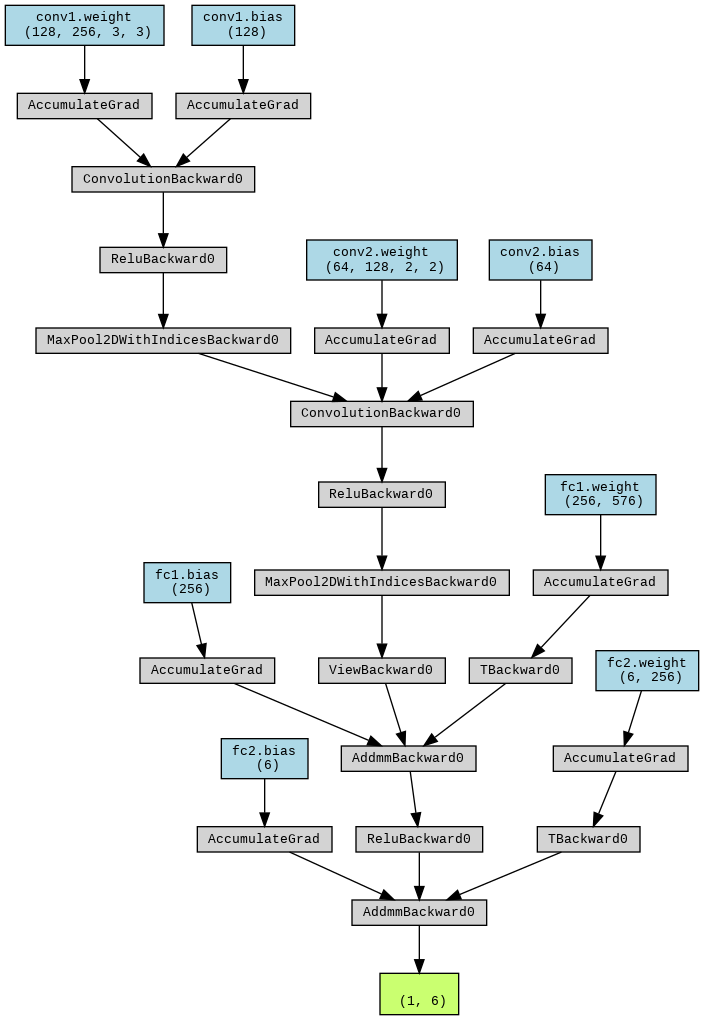

In [ ]:
import torch
from torchviz import make_dot

# Create an instance of your CNN model
model = CNN_Classifier_for_ALNC()

# Create a dummy input with the specified input size
dummy_input = torch.randn(1, 256, 6, 6)

# Forward pass to generate a computational graph
output = model(dummy_input)

# Visualize the computational graph with make_dot
graph = make_dot(output, params=dict(model.named_parameters()))

# Extract layer names and connections
layer_names = [op.replace('Backward', '').split('\n')[0] for op in graph.source.split('->')]

# Simplify the graph by removing detailed information
simplified_source = ' -> '.join(layer_names)
simplified_graph = make_dot(output, params=dict(model.named_parameters()), show_attrs=False)

# Display the simplified graph
simplified_graph.render('cnn_simplified_graph', format='png', cleanup=True)

# Show the simplified graph in the notebook
from IPython.display import Image
Image(filename='cnn_simplified_graph.png')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 36, 36]         295,040
         MaxPool2d-2          [-1, 128, 18, 18]               0
            Conv2d-3           [-1, 64, 19, 19]          32,832
         MaxPool2d-4             [-1, 64, 9, 9]               0
            Linear-5                  [-1, 256]         147,712
            Linear-6                    [-1, 6]           1,542
Total params: 477,126
Trainable params: 477,126
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 1.00
Forward/backward pass size (MB): 1.80
Params size (MB): 1.82
Estimated Total Size (MB): 4.62
----------------------------------------------------------------


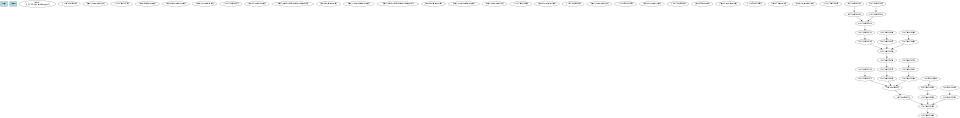

In [ ]:


# Create a dummy input with the specified input size
dummy_input = Variable(torch.randn(1, 256, 6, 6))

# Display a text-based summary using torchsummary
summary(model, input_size=(256, 32, 32), device="cpu")

# Visualize the computational graph with make_dot
output = model(dummy_input)
graph = make_dot(output, params=dict(model.named_parameters()))

# Save the graph as PNG
graph.render('cnn_graph', format='png', cleanup=True)

# Load the graph using graphviz to display it
simplified_graph = Digraph()
simplified_graph.attr(size='10,10')
simplified_graph.node('Input', shape='box', style='filled', fillcolor='lightblue')
simplified_graph.node('Output', shape='box', style='filled', fillcolor='lightblue')

# Add nodes and edges from the graphviz object
for node in graph.body:
    node_parts = node.split(' ')
    node_id = node_parts[0]
    node_label = ' '.join(node_parts[1:])
    simplified_graph.node(node_id, label=node_label)

for edge in graph.body:
    if '->' in edge:
        edge_parts = edge.split('->')
        simplified_graph.edge(edge_parts[0].strip(), edge_parts[1].strip())

# Display the graph
simplified_graph.render('cnn_graph_rendered', format='png', cleanup=True)
from IPython.display import Image
Image(filename='cnn_graph_rendered.png')
